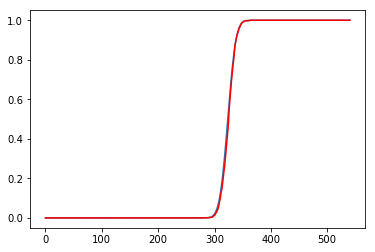

In [17]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
n = 540
p = 0.6

x1 = np.arange(0, n+1)
y1= binom.cdf(x1, n, p)#теоретична  функція ймовірності - значення в точках з х1
plt.plot(x1, y1)
binom_rvs =binom.rvs(n=n, p=p, size=1000)
my_list=[]

for i in x1:
    my_list.append(sum((binom_rvs)<i))
#print(my_list)
emp_cdf=np.array(my_list)/1000
#print(emp_cdf)

plt.plot(x1,emp_cdf, 'r')
plt.show()



In [21]:
print ('емпірична медіана', np.sort(binom_rvs)[500])
print ('емпіричний нижній квартиль', np.sort(binom_rvs)[250])
print ('емпіричний верхній квартиль', np.sort(binom_rvs)[750])
print('теоретична медіана',  binom.ppf(0.5, n=n, p=p))
print( 'теоретичний нижній квартиль', binom.ppf(0.25, n=n, p=p))
print( 'теоретичний верхній квартиль', binom.ppf(0.75, n=n, p=p))


емпірична медіана 325
емпіричний нижній квартиль 317
емпіричний верхній квартиль 332
теоретична медіана 324.0
теоретичний нижній квартиль 316.0
теоретичний верхній квартиль 332.0


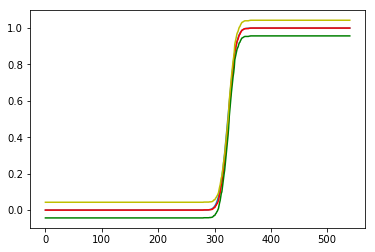

In [25]:
#рахуємо та будуємо графічно довірчий інтервал
def F_empir (x):
    return(sum(x>binom_rvs)/1000)
y3=[]
y4=[]
xp=1.36/(1000**0.5)
for i in x1:
    y3.append (F_empir (i)-xp)
    y4.append (F_empir (i)+xp)
y3=np.array(y3)
y4=np.array(y4)  
plt.plot(x1, y1)#будуєм синім графік теоретичної функції ймовірності 
plt.plot(x1,emp_cdf, 'r')#будуєм червоним графік емпіричної функції ймовірності (майже накладається на графік теоретичної)
plt.plot(x1,y3, 'g')#будуєм зеленим нижню межу довірчого інтервалу
plt.plot(x1,y4, 'y')#будуєм жовтим верхню межу довірчого інтервалу
plt.show()